# Importing needed libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

# Importing the dataset

__This data set priovides the information about the different movies which are selled and from this data set we extract the information that which pair of movie are sold most.__  


    Both X and Y can be placed on the same shelf, so that buyers of one item would be prompted to buy the other.  
    Promotional discounts could be applied to just one out of the two items.  
    Advertisements on X could be targeted at buyers who purchase Y.  
    X and Y could be combined into a new product, such as having Y in flavors of X.  


In [18]:
movies=pd.read_csv('my_movies.csv')

In [19]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


__As we can see that the data set is containing mixed data of movies where half columns are containg the movies combination in string form and other half columns containing same data in encoded form__

In [21]:
movies=movies.iloc[:,5:]

In [22]:
movies.shape

(10, 10)

In [23]:
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


__10 Rows and 10 Columns__

In [24]:
movies.columns

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

__This are the Different Names of movies that are present in the data set.__  
'Sixth Sense'  
'Gladiator'  
'LOTR1'  
'Harry Potter1'  
'Patriot'  
'LOTR2'  
'Harry Potter2'  
'LOTR'  
'Braveheart'  
'Green Mile'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


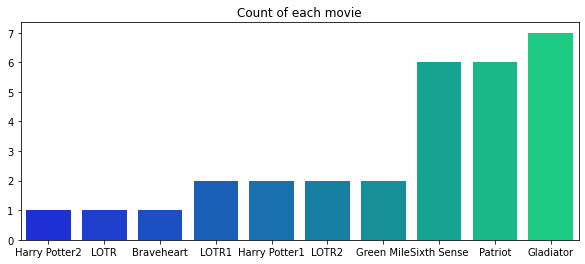

In [26]:
count=movies.sum().sort_values()
plt.figure(figsize=(10,4))
plt.title('Count of each movie')
sns.barplot(count.index,count,palette='winter');

We can see that Gladiator is the most picked movies.

# Association rules

Association rules analysis is a technique to uncover how items are associated to each other

In [33]:
'''
min_support : float (default: 0.5)
              A float between 0 and 1 for minumum support of the itemsets returned.
              The support is computed as the fraction
              `transactions_where_item(s)_occur / total_transactions`.
'''
frequent_itemsets = apriori(movies, min_support=0.0001, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [10]:
frequent_itemsets.sort_values("support",ascending=False)

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Gladiator, Sixth Sense)"
30,0.4,"(Gladiator, Sixth Sense, Patriot)"
13,0.4,"(Sixth Sense, Patriot)"
9,0.2,(Green Mile)
22,0.2,"(LOTR1, LOTR2)"
16,0.2,"(Green Mile, Sixth Sense)"


In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=.8)
#rules = association_rules(frequent_itemsets, metric="support", min_threshold=0)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(LOTR1, LOTR2, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(LOTR2),"(LOTR1, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Sixth Sense),"(LOTR1, Green Mile, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
244,(LOTR1),"(Green Mile, LOTR2, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


___Support :: This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.___
  
__The Highest Value of Support goes for single movie as high upto 0.7 for Gladiator .__  
__The Highest Value of Support goes for pair of movie as high upto 0.6 for (Patriot, Gladiator).__  
__The Highest Value of Support goes for 3 set of moives as high upto 0.4 for (Patriot, Gladiator, Sixth Sense) .__  
 


In [29]:
rules.sort_values('support',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
14,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
41,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.40
...,...,...,...,...,...,...,...,...,...
95,(Sixth Sense),"(LOTR, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
96,"(Braveheart, Patriot)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
97,"(Gladiator, Patriot)",(Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
98,"(Braveheart, Gladiator)",(Patriot),0.1,0.6,0.1,1.000000,1.666667,0.04,inf


### For Confidence

This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears  
->  If the value equals to 1 then every time A item was bought the B item was also bought__

One drawback of the confidence measure is that it might misrepresent the importance of an consquent. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure.

In [32]:
rules.sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
160,"(LOTR1, Green Mile, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
80,"(Harry Potter1, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
93,(LOTR),"(Green Mile, Sixth Sense)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
191,"(Harry Potter1, Sixth Sense, LOTR2)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
91,"(LOTR, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
...,...,...,...,...,...,...,...,...,...
17,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
19,(Gladiator),(Braveheart),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
106,(Gladiator),"(LOTR, Green Mile)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
143,(Gladiator),"(LOTR, Green Mile, Sixth Sense)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05


__The highest confidence value is  1 for which most of the time set contain movie Green Mile which means that we can use postion of Green Mile movie to sell other movies which are less popoular like (Harry Potter1,Harry Potter2, LOTR1,LOTR2) .__ 

### For Lift

To account for the base popularity of both constituent items, we use a third measure called lift.This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.  
A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

In [35]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
135,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
104,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
210,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
207,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
206,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
65,(Sixth Sense),"(LOTR1, LOTR2)",0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


We can see from the support value that the chances of picking LOTR is .1 which is very low but when the Set of 3 movies (Gladiator, Green Mile, Sixth Sense) are picked its chance to also get picked become very high.


__From All of the above data we can clearly see that :  
the sale of (Gladiator, Green Mile, Sixth Sense ) have high high impact on the sale of the other movies and which can help us to increase the sale of less popular movies.We also need to maintain the stock of these movies as they alone are most selling movies. __

In [38]:
# all the combination where tje value of lift if Greater than 1
rules[rules.lift>5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
104,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
105,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
135,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
138,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
139,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
142,(LOTR),"(Gladiator, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
150,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
151,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
154,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
155,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
